In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# y0 = k1*y1 + m1
# yN = k2*yN-1 + m2

# A * x_n-1 - C_n * x_n + B * x_n+1 = -F_n

def TMA(A, B, C, F, k1=0, k2=0, m1=0, m2=0):
    
    N = C.shape[0]
    
    x = np.zeros(N+1)
    
    alpha = np.zeros(N+1)
    beta = np.zeros(N+1)
    
    alpha[0] = k1
    beta[0] = m1

    for n in range(1,N):
        alpha[n] = B[n] / (C[n] - A[n]*alpha[n-1])
        beta[n] = (F[n] + A[n]*beta[n-1]) / (C[n] - A[n]*alpha[n-1])
            
    x[N] = (m2 + k2*beta[N-1]) / (1 - k2*alpha[N-1])
    
    for n in range(N-1, -1, -1):
        x[n] = alpha[n]*x[n+1] + beta[n]
        
    return x

In [225]:
N = {}
N['x'] = 40
N['y'] = 60
N['t'] = 100

In [226]:
h = {}
h['x'] = (lim['x'][1] - lim['x'][0]) / (N['x'] + 1)
h['y'] = (lim['y'][1] - lim['y'][0]) / (N['y']) # граничные условтя второго рода
h['t'] = (lim['x'][1] - lim['x'][0]) / (N['x'] + 1)

In [227]:
lim = {}
lim['x'] = (0, 1)
lim['y'] = (0, 2)
lim['t'] = (0, 1)

In [228]:
h['x'] = (lim['x'][1] - lim['x'][0]) / (N['x'] + 1)
h['y'] = (lim['y'][1] - lim['y'][0]) / (N['y']) # граничные условтя второго рода
h['t'] = (lim['x'][1] - lim['x'][0]) / (N['x'] + 1)

In [229]:
def x(n):
    return lim['x'][0] + h['x']*n

def y(n):
    return lim['y'][0] + h['y']*n - h['y'] / 2

def t(n):
    return lim['t'][0] + h['t']*n

In [327]:
def f(i, j, k):
    return (1 / (2 - x(i))) * \
    (1 - x(i) + 2*t(k)*np.sin(np.pi*x(i) * np.cosh(np.pi*y(j))) / \
     np.pi*np.sinh(2*np.pi) ) 
    
def L2(u, i, j):
    return (u[i,j+1] - 2*u[i,j] + u[i,j-1]) / h['y']**2

def L1(u, i, j):
    return (u[i-1,j] - 2*u[i,j] + u[i+1,j]) / h['x']**2  + (2*x(i) - 4) / (2 - x(i))**2 * (u[i+1,j] - u[i-1,j])/ h['x']

def u0(i, j):
    return np.sin(2*np.pi*x(i)) / (2 - x(i))

In [328]:
w = np.zeros((N['x']+1, N['y']+1))
u = np.zeros((N['t']+1, N['x']+1, N['y']+1))

In [329]:
## Начальные условия
for i in range(N['x']+1):
    for j in range(N['y']+1):
        u[0,i,j] = u0(i,j)
        
## Граничные условия по x
for k in range(N['t']+1):
    for j in range(N['y']+1):
        u[k,0,j] = t(k)
        u[k,N['x'],j] = 0


In [330]:
##  1 этап
A_x = np.zeros(N['x'])
B_x = np.zeros(N['x'])
C_x = np.zeros(N['x'])
F_x = np.zeros(N['x'])

A_y = np.zeros(N['y'])
B_y = np.zeros(N['y'])
C_y = np.zeros(N['y'])
F_y = np.zeros(N['y'])


for k in range(3):
    
    # первый переход
    for j in range(1,N['y']):
        for i in range(1, N['x']):

            A_x[i] = h['t'] / (2 * h['x']**2) - (2*x(i) - 4) / ((x(i)-2)**2) * (h['t'] / (4*h['x']))
            C_x[i] = h['t'] / h['x']**2 - 1
            B_x[i] = h['t'] / (2 * h['x']**2) + (2*x(i) - 4) / ((x(i)-2)**2) * (h['t'] / (4*h['x']))
            
            F_x[i] = L1(u[k], i, j) + L2(u[k], i, j) - f(i, j, k+0.5)

            
        w[:,j] = TMA(A_x, B_x, C_x, F_x, m1=1, m2=0)
            
        
        w[:,0] = w[:,1]
        
        for i in range(1,N['x']):    
            w[i,N['y']] = w[i,N['y']-1] + h['y']*2*t(k+0.5)*np.sin(np.pi*x(i))
            
    # второй переход
    for i in range(1,N['x']):
        
        for j in range(1,N['y']):
            
            A_y[j] = 1 / h['y']**2
            C_y[j] = (1 / h['y']**2 + 1 / h['t'] )
            B_y[j] = 1 / h['y']**2
            
            F_y[j] = -L2(u[k], i, j) / 2 - w[i,j] - u[k,i,j]  / h['t']
            #F_y[j] =  w[i,j] + u[k,i,j]  / h['t']

            
        m2 = h['y'] * t(k+1)**2 * np.sin(np.pi * x(i))
        k2 = 1
        k1 = 1
        
        u[k+1, i, :] = TMA(A_y, B_y, C_y, F_y, k1=k1, k2=k2, m2=m2)
        #u[k+1, i, :] = TMA(A_y, B_y, C_y, F_y)
        

In [331]:
u[1]

array([[ 0.02439024,  0.02439024,  0.02439024, ...,  0.02439024,
         0.02439024,  0.02439024],
       [ 0.00794431,  0.00794431,  0.01115423, ...,  0.01156163,
         0.0177086 ,  0.01771012],
       [ 0.0154603 ,  0.0154603 ,  0.02135185, ...,  0.02206166,
         0.03398827,  0.03399129],
       ..., 
       [-0.04054689, -0.04054689, -0.04036779, ..., -0.04029906,
        -0.03085486, -0.03085034],
       [-0.01784997, -0.01784997, -0.01758933, ..., -0.01749391,
        -0.01268058, -0.01267755],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

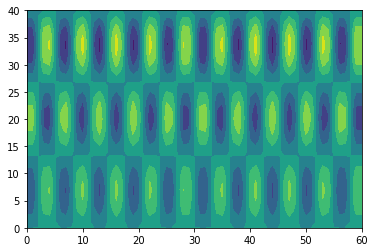

In [332]:
plt.contourf(u[3])